<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/tax_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Data**

In [1]:
!wget https://www.irs.gov/pub/irs-soi/05in01aan.xls

--2025-08-16 12:42:17--  https://www.irs.gov/pub/irs-soi/05in01aan.xls
Resolving www.irs.gov (www.irs.gov)... 23.195.107.173, 23.195.107.171, 2600:1408:ec00:a::1730:cbd4, ...
Connecting to www.irs.gov (www.irs.gov)|23.195.107.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46592 (46K) [application/vnd.ms-excel]
Saving to: ‘05in01aan.xls’

05in01aan.xls       100%[===================>]  45.50K  --.-KB/s    in 0.02s   

2025-08-16 12:42:17 (2.91 MB/s) - ‘05in01aan.xls’ saved [46592/46592]



In [34]:
!wget https://www.irs.gov/pub/irs-soi/22in41ts.xls

--2025-08-16 12:58:04--  https://www.irs.gov/pub/irs-soi/22in41ts.xls
Resolving www.irs.gov (www.irs.gov)... 23.56.237.38, 23.56.237.53, 2600:1408:ec00:a::1727:ae84, ...
Connecting to www.irs.gov (www.irs.gov)|23.56.237.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82944 (81K) [application/vnd.ms-excel]
Saving to: ‘22in41ts.xls’

22in41ts.xls        100%[===================>]  81.00K  --.-KB/s    in 0.04s   

2025-08-16 12:58:04 (1.82 MB/s) - ‘22in41ts.xls’ saved [82944/82944]



### **Import Libraries**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Read In Data**

In [53]:
df = pd.read_excel('./05in01aan.xls', skiprows=7)
df = df.iloc[:-7]
df = df.iloc[:, :2]
df.columns = ['Year', 'Returns']
df['Returns'] /= 1000
df.tail()

,Year,Returns
88,2001,130.255
89,2002,130.076
90,2003,130.424
91,2004,132.226
92,2005,134.373


In [54]:
df1 = pd.read_excel('./22in41ts.xls', skiprows=6)
df1 = df1.iloc[:22]
df1 = df1.iloc[:, :2]
df1.columns = ['Year', 'Returns']
df1['Returns'] /= 1_000_000
df1.head()

,Year,Returns
0,2001,119.370886
1,2002,119.850561
2,2003,120.758947
3,2004,122.509974
4,2005,124.673055


In [50]:
df = pd.concat([df, df1]).reset_index(drop=True)

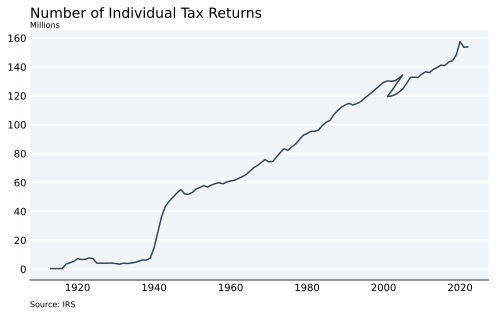

In [51]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.05, s='Number of Individual Tax Returns', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Millions', transform=ax.transAxes, size=8)
plt.plot(df['Year'], df['Returns'], color='#36454F')
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
ax.annotate("Source: IRS",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
fig.savefig('./tax_returns.png')
plt.show()